In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from datetime import datetime, timedelta

# Set up visualization defaults
plt.style.use('ggplot')
sns.set_theme()
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)

# Ensure plots display properly in Jupyter
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Define base directory (where your data is located)
BASE_DIR = '/home/aladhimarkets/Thalex_SimpleQuouter/metrics'

# Define paths to data files using absolute paths
METRICS_FILE = os.path.join(BASE_DIR, 'metrics.csv')
TRADES_FILE = os.path.join(BASE_DIR, 'trades.csv')
SYSTEM_FILE = os.path.join(BASE_DIR, 'system_stats.csv')
TRADE_HISTORY_FILE = os.path.join(BASE_DIR, 'trade_history.csv')
QUOTE_METRICS_FILE = os.path.join(BASE_DIR, 'quote_metrics.csv')
PERFORMANCE_METRICS_FILE = os.path.join(BASE_DIR, 'performance_metrics.csv')

# Check if files exist
for file_path in [METRICS_FILE, TRADES_FILE, SYSTEM_FILE, 
                  TRADE_HISTORY_FILE, QUOTE_METRICS_FILE, PERFORMANCE_METRICS_FILE]:
    print(f"File {file_path} exists: {os.path.exists(file_path)}")

File /home/aladhimarkets/Thalex_SimpleQuouter/metrics/metrics.csv exists: True
File /home/aladhimarkets/Thalex_SimpleQuouter/metrics/trades.csv exists: True
File /home/aladhimarkets/Thalex_SimpleQuouter/metrics/system_stats.csv exists: True
File /home/aladhimarkets/Thalex_SimpleQuouter/metrics/trade_history.csv exists: True
File /home/aladhimarkets/Thalex_SimpleQuouter/metrics/quote_metrics.csv exists: True
File /home/aladhimarkets/Thalex_SimpleQuouter/metrics/performance_metrics.csv exists: True


In [3]:
# Load metrics data
try:
    metrics_df = pd.read_csv(METRICS_FILE)
    # Convert timestamp to datetime
    metrics_df['datetime'] = pd.to_datetime(metrics_df['datetime'])
    metrics_df.set_index('datetime', inplace=True)
    print(f"Loaded {len(metrics_df)} metrics records")
    
    # Display basic statistics
    metrics_df.describe()
except Exception as e:
    print(f"Error loading metrics data: {e}")

Loaded 220 metrics records


In [4]:
# Load trades data
try:
    trades_df = pd.read_csv(TRADES_FILE)
    # Convert timestamp to datetime
    trades_df['datetime'] = pd.to_datetime(trades_df['datetime'])
    trades_df.set_index('datetime', inplace=True)
    print(f"Loaded {len(trades_df)} trade records")
    
    # Display first few trades
    trades_df.head()
except Exception as e:
    print(f"Error loading trades data: {e}")

Loaded 374 trade records


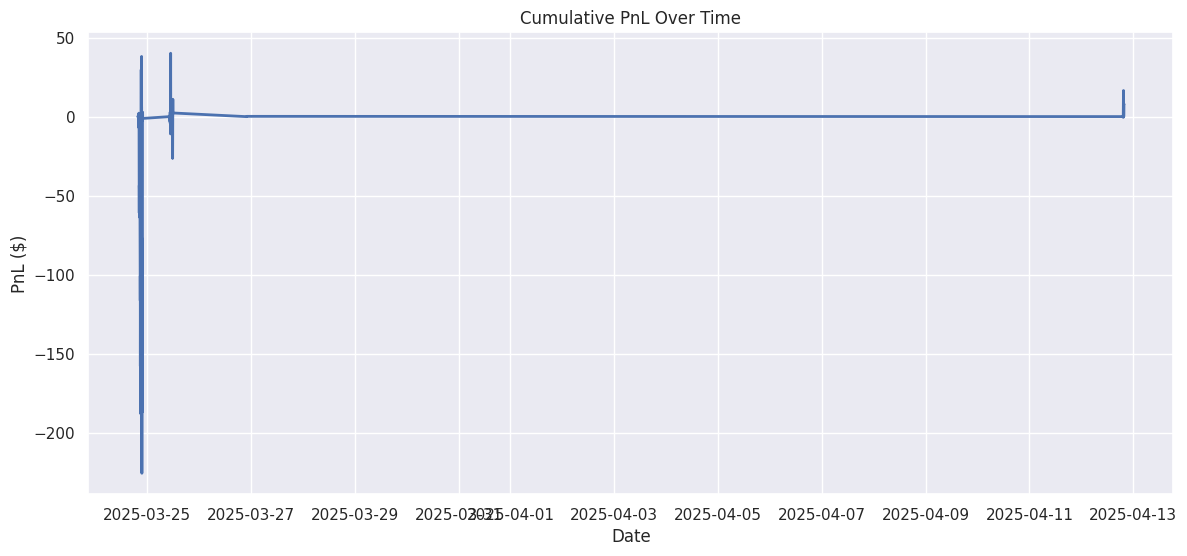

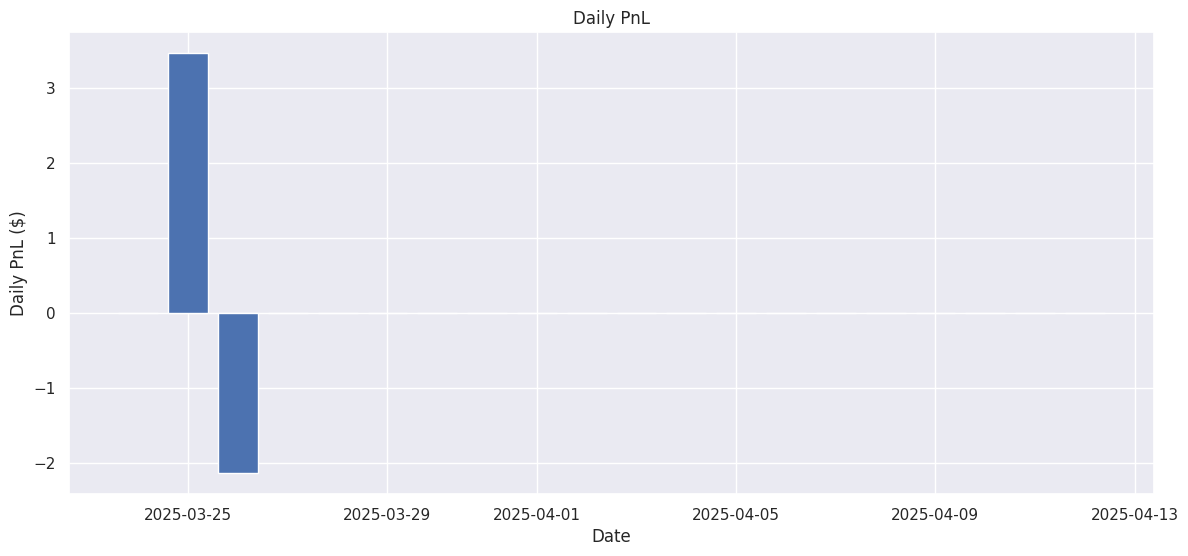

In [5]:
# Plot PnL over time
if 'metrics_df' in locals():
    plt.figure(figsize=(14, 6))
    plt.plot(metrics_df.index, metrics_df['pnl'], linewidth=2)
    plt.title('Cumulative PnL Over Time')
    plt.xlabel('Date')
    plt.ylabel('PnL ($)')
    plt.grid(True)
    plt.show()
    
    # Calculate daily PnL
    daily_pnl = metrics_df['pnl'].resample('D').last().diff().fillna(0)
    
    plt.figure(figsize=(14, 6))
    plt.bar(daily_pnl.index, daily_pnl, width=0.8)
    plt.title('Daily PnL')
    plt.xlabel('Date')
    plt.ylabel('Daily PnL ($)')
    plt.grid(True)
    plt.show()

In [6]:
# Create an interactive PnL chart with Plotly
if 'metrics_df' in locals():
    fig = go.Figure()
    
    # Add PnL line
    fig.add_trace(go.Scatter(
        x=metrics_df.index,
        y=metrics_df['pnl'],
        mode='lines',
        name='PnL',
        line=dict(width=2, color='#2ecc71')
    ))
    
    # Add position as a second axis
    fig.add_trace(go.Scatter(
        x=metrics_df.index,
        y=metrics_df['position'],
        mode='lines',
        name='Position',
        line=dict(width=1.5, color='#3498db', dash='dash'),
        yaxis='y2'
    ))
    
    # Set up layout with two y-axes
    fig.update_layout(
        title='PnL and Position Over Time',
        xaxis=dict(title='Date'),
        yaxis=dict(title='PnL ($)', side='left'),
        yaxis2=dict(title='Position', side='right', overlaying='y'),
        legend=dict(x=0.01, y=0.99),
        height=600,
        hovermode='x unified'
    )
    
    fig.show()

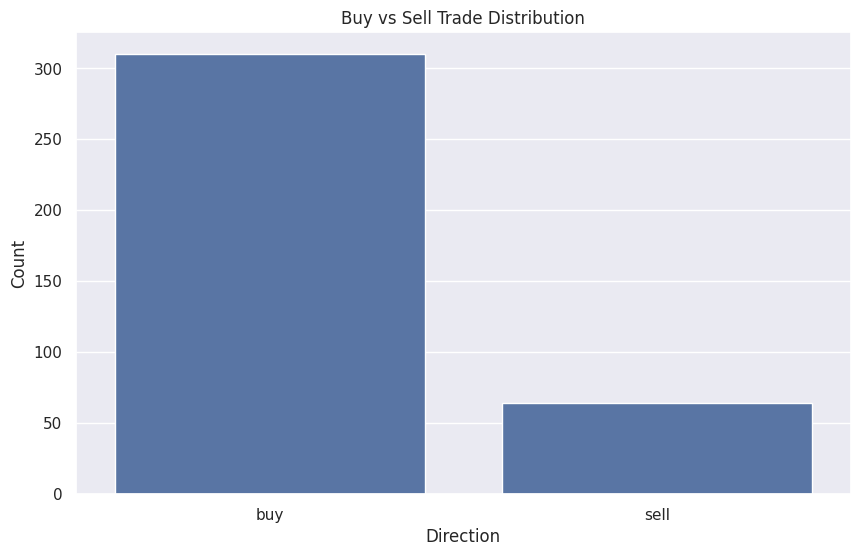

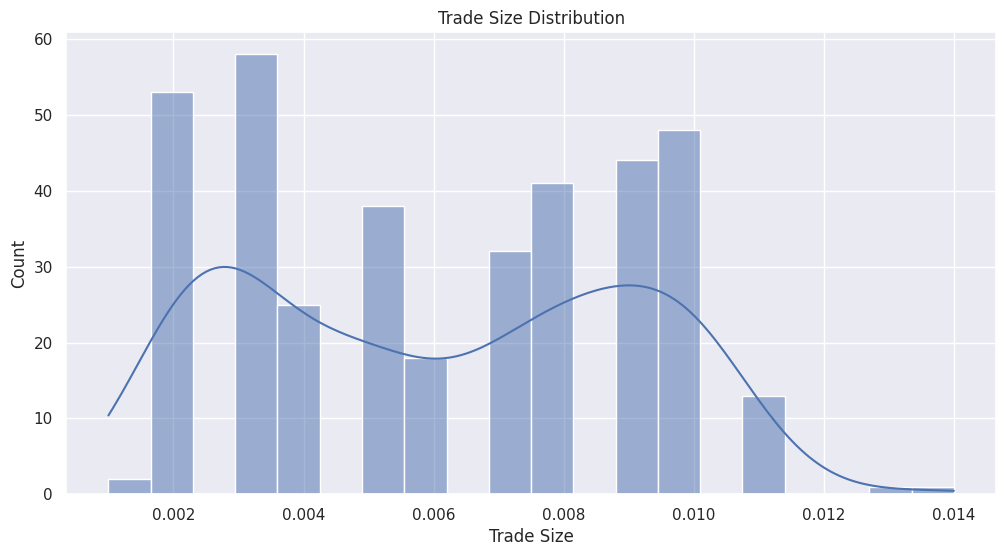

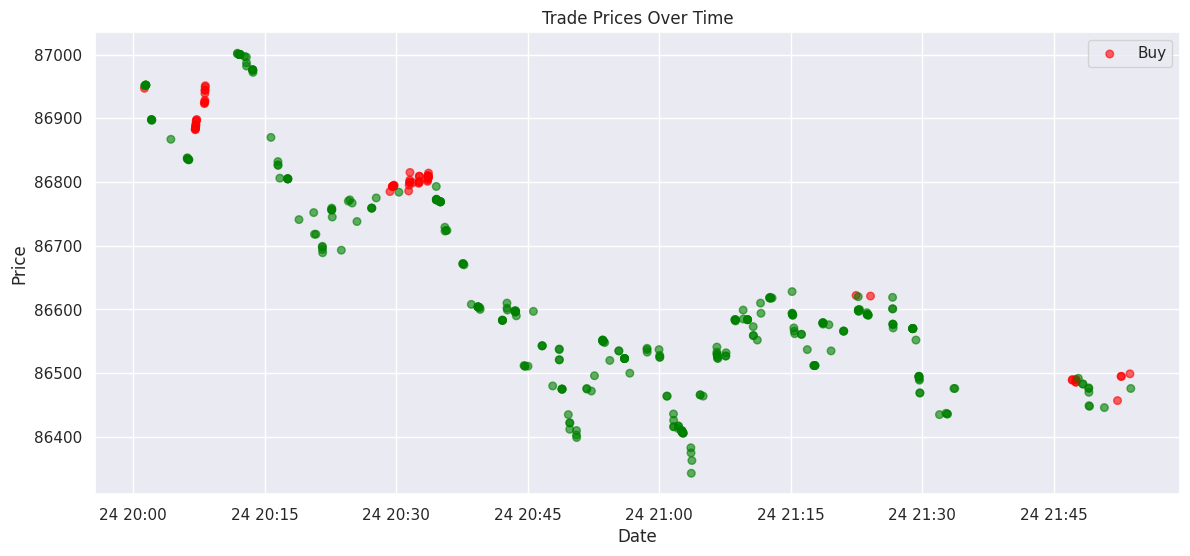

In [7]:
# Analyze trade distribution
if 'trades_df' in locals():
    # Count buys vs sells
    trade_counts = trades_df['direction'].value_counts()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=trade_counts.index, y=trade_counts.values)
    plt.title('Buy vs Sell Trade Distribution')
    plt.xlabel('Direction')
    plt.ylabel('Count')
    plt.show()
    
    # Analyze trade sizes
    plt.figure(figsize=(12, 6))
    sns.histplot(trades_df['amount'], bins=20, kde=True)
    plt.title('Trade Size Distribution')
    plt.xlabel('Trade Size')
    plt.ylabel('Count')
    plt.show()
    
    # Trade prices over time
    plt.figure(figsize=(14, 6))
    plt.scatter(trades_df.index, trades_df['price'], 
                c=trades_df['direction'].map({'buy': 'green', 'sell': 'red'}),
                alpha=0.6, s=30)
    plt.title('Trade Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend(['Buy', 'Sell'])
    plt.show()

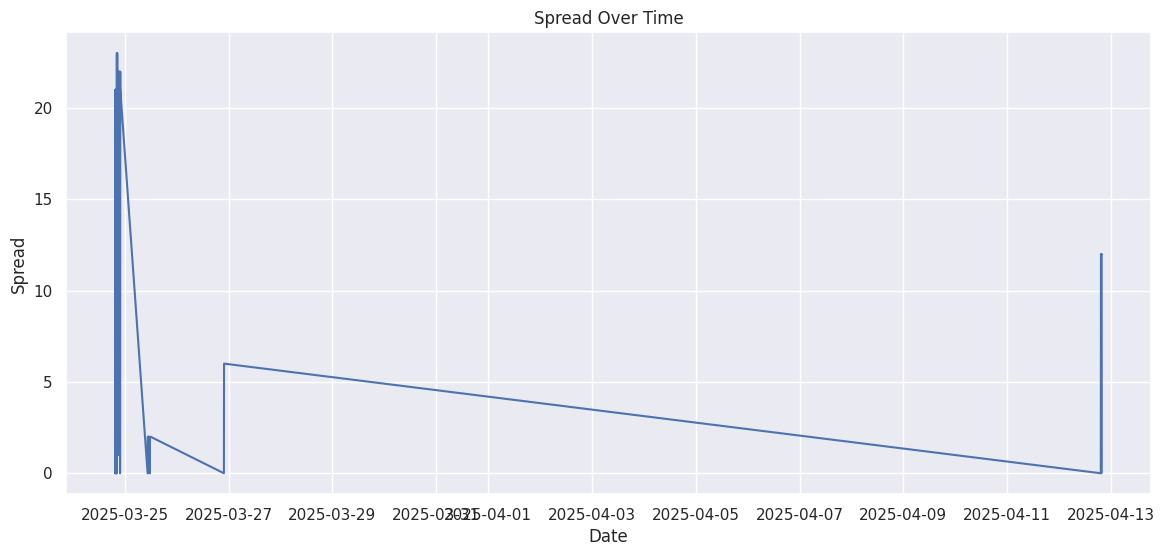

/tmp/ipykernel_425576/3532114278.py:13: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



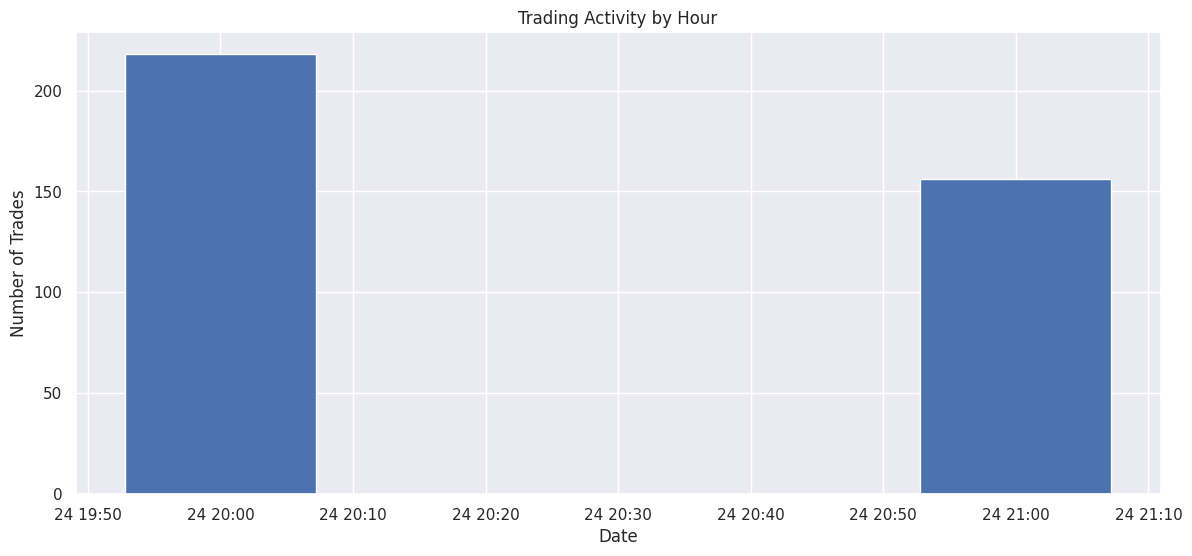

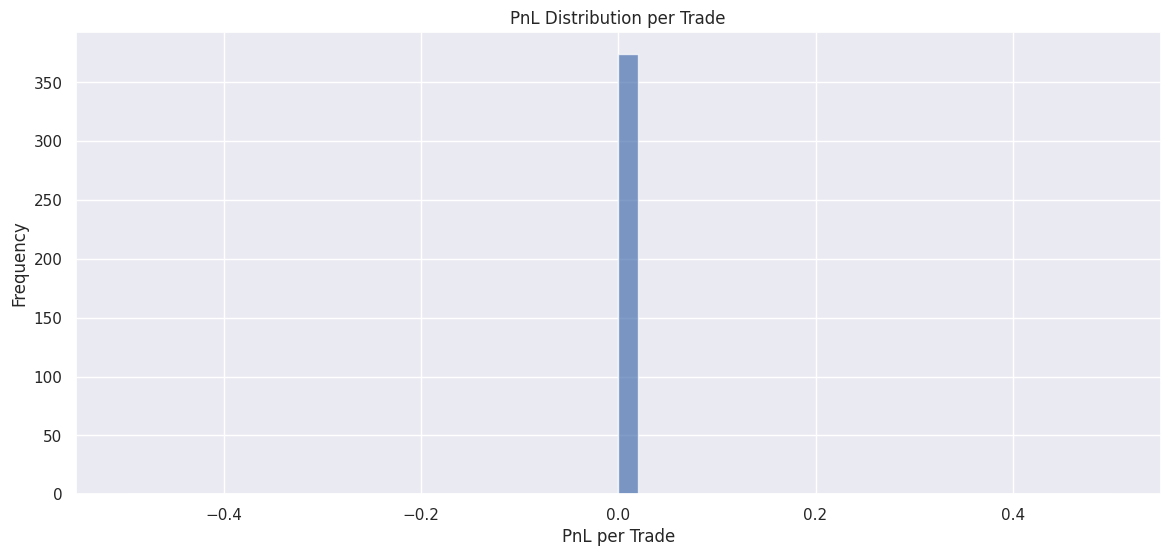

In [8]:
# Calculate market making metrics
if 'metrics_df' in locals() and 'trades_df' in locals():
    # Calculate spread over time
    plt.figure(figsize=(14, 6))
    plt.plot(metrics_df.index, metrics_df['spread'], linewidth=1.5)
    plt.title('Spread Over Time')
    plt.xlabel('Date')
    plt.ylabel('Spread')
    plt.grid(True)
    plt.show()
    
    # Calculate trading activity
    hourly_trades = trades_df.resample('H').size()
    
    plt.figure(figsize=(14, 6))
    plt.bar(hourly_trades.index, hourly_trades, width=0.01)
    plt.title('Trading Activity by Hour')
    plt.xlabel('Date')
    plt.ylabel('Number of Trades')
    plt.grid(True)
    plt.show()
    
    # Calculate PnL per trade
    if 'pnl' in trades_df.columns:
        plt.figure(figsize=(14, 6))
        plt.hist(trades_df['pnl'], bins=50, alpha=0.7)
        plt.title('PnL Distribution per Trade')
        plt.xlabel('PnL per Trade')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

In [9]:
# Import config to analyze current parameters
import sys
sys.path.append('../..')

try:
    from thalex_py.Thalex_modular.config.market_config import TRADING_CONFIG, TRADING_PARAMS
    
    # Display current Avellaneda parameters
    print("Current Avellaneda Parameters:")
    for key, value in TRADING_CONFIG['avellaneda'].items():
        print(f"  {key}: {value}")
        
    # Display volatility settings
    print("\nVolatility Parameters:")
    for key, value in TRADING_PARAMS['volatility'].items():
        print(f"  {key}: {value}")
except Exception as e:
    print(f"Error loading config: {e}")

Current Avellaneda Parameters:
  gamma: 0.2
  kappa: 0.5
  time_horizon: 3600
  min_spread: 3.0
  max_spread: 25.0
  inventory_weight: 0.8
  inventory_cost_factor: 0.0001
  max_loss_threshold: 0.03
  min_profit_rebalance: 0.01
  fixed_volatility: 0.01
  position_fade_time: 300
  order_flow_intensity: 2.0
  adverse_selection_threshold: 0.002
  position_limit: 1.0

Volatility Parameters:
  default: 0.025
  window: 75
  min_samples: 5
  scaling: 1.3
  floor: 0.015
  ceiling: 0.18
  ewm_span: 15
  cache_duration: 30


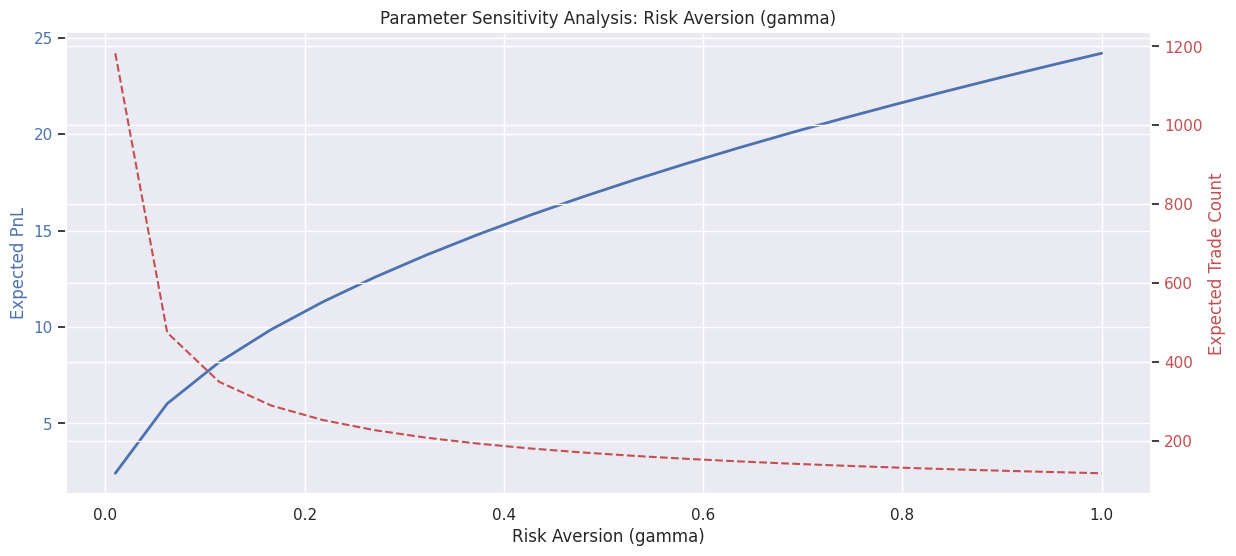

Optimal gamma based on this simple simulation: 1.0000


In [10]:
# Helper function to simulate market making with different risk aversion parameters
def simulate_avellaneda_pnl(gamma_values, metrics_df, trades_df):
    """Simple simulation of expected PnL with different gamma values"""
    
    results = []
    
    # Use a very simple model for simulation purposes
    # In a real analysis, you would use the actual Avellaneda formulas
    base_spread = metrics_df['spread'].mean()
    trade_count = len(trades_df)
    avg_trade_size = trades_df['amount'].mean() if 'amount' in trades_df.columns else 1.0
    
    for gamma in gamma_values:
        # Higher gamma = wider spread = fewer trades but higher PnL per trade
        # This is a simplified model for demonstration
        simulated_spread = base_spread * (gamma / 0.1)  # 0.1 is a reference gamma
        expected_trade_count = trade_count * (0.1 / gamma)**0.5  # Fewer trades with higher gamma
        expected_pnl_per_trade = simulated_spread * avg_trade_size * 0.3  # Capture 30% of spread
        expected_total_pnl = expected_trade_count * expected_pnl_per_trade
        
        results.append({
            'gamma': gamma,
            'expected_spread': simulated_spread,
            'expected_trades': expected_trade_count,
            'expected_pnl': expected_total_pnl
        })
    
    return pd.DataFrame(results)

# Simulate with different gamma values if we have data
if 'metrics_df' in locals() and 'trades_df' in locals() and len(metrics_df) > 0 and len(trades_df) > 0:
    # Define a range of gamma values to test
    gamma_values = np.linspace(0.01, 1.0, 20)
    
    # Run simulation
    simulation_results = simulate_avellaneda_pnl(gamma_values, metrics_df, trades_df)
    
    # Plot results
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    ax1.plot(simulation_results['gamma'], simulation_results['expected_pnl'], 'b-', linewidth=2)
    ax1.set_xlabel('Risk Aversion (gamma)')
    ax1.set_ylabel('Expected PnL', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    ax2 = ax1.twinx()
    ax2.plot(simulation_results['gamma'], simulation_results['expected_trades'], 'r--', linewidth=1.5)
    ax2.set_ylabel('Expected Trade Count', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    plt.title('Parameter Sensitivity Analysis: Risk Aversion (gamma)')
    plt.grid(True)
    plt.show()
    
    # Find optimal gamma
    optimal_idx = simulation_results['expected_pnl'].idxmax()
    optimal_gamma = simulation_results.loc[optimal_idx, 'gamma']
    print(f"Optimal gamma based on this simple simulation: {optimal_gamma:.4f}")
else:
    print("Insufficient data for parameter sensitivity analysis")

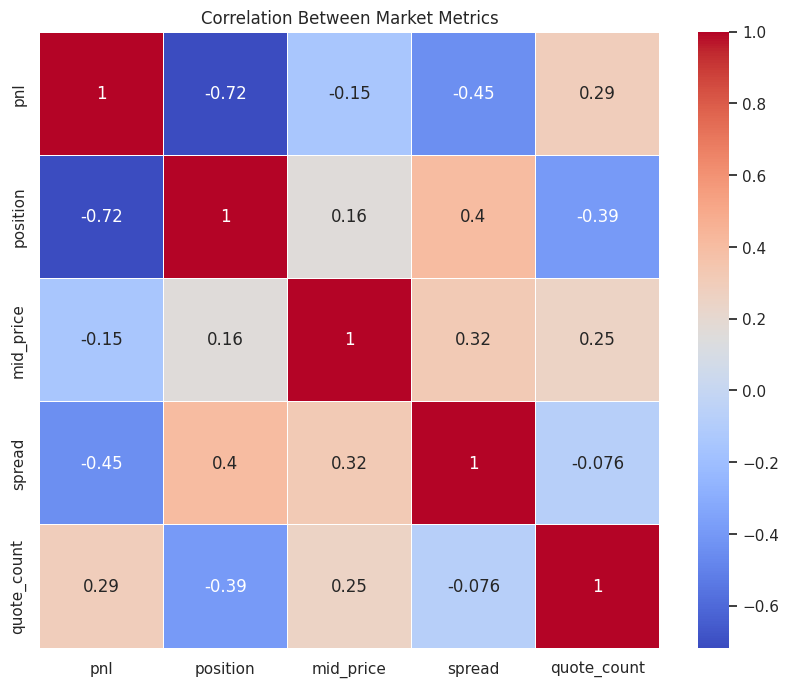

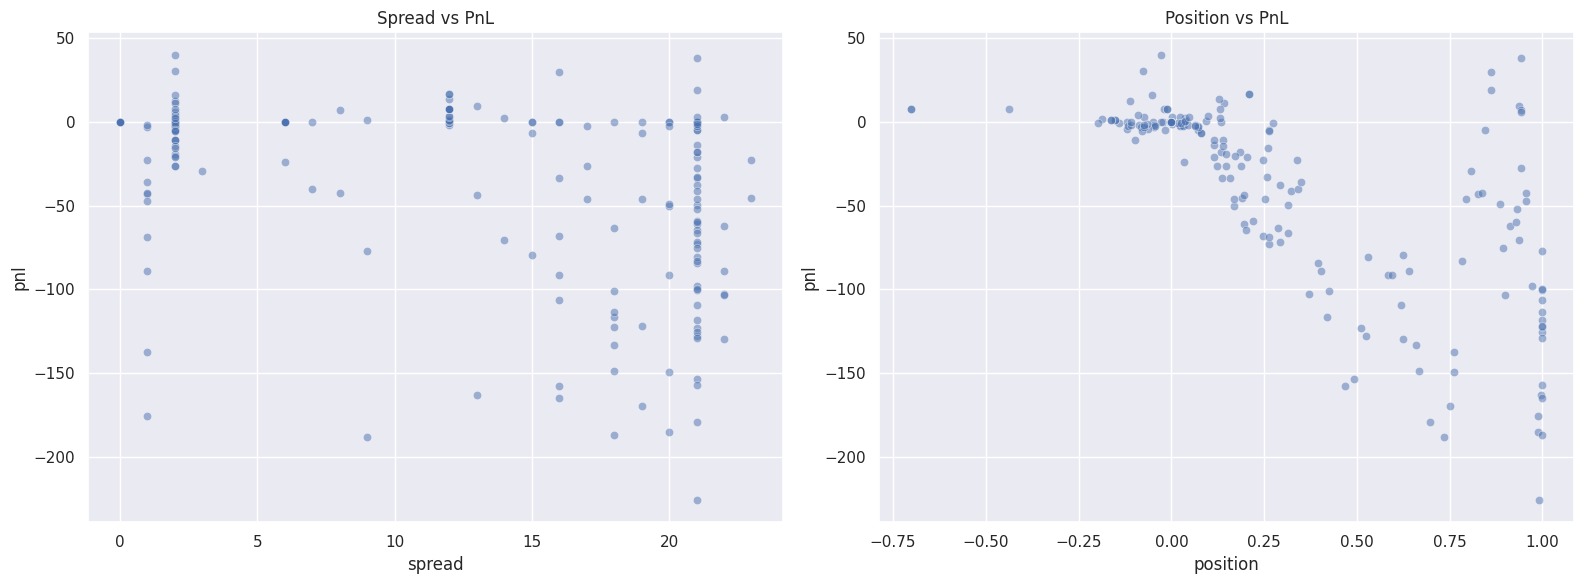

In [11]:
# Analyze relationship between spread, mid price, and pnl
if 'metrics_df' in locals() and len(metrics_df) > 0:
    # Create a correlation matrix
    corr_matrix = metrics_df[['pnl', 'position', 'mid_price', 'spread', 'quote_count']].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Between Market Metrics')
    plt.show()
    
    # Scatter plot of important relationships
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Spread vs PnL
    sns.scatterplot(x='spread', y='pnl', data=metrics_df, ax=axes[0], alpha=0.5)
    axes[0].set_title('Spread vs PnL')
    
    # Position vs PnL
    sns.scatterplot(x='position', y='pnl', data=metrics_df, ax=axes[1], alpha=0.5)
    axes[1].set_title('Position vs PnL')
    
    plt.tight_layout()
    plt.show()

In [12]:
# Calculate key performance metrics
if 'metrics_df' in locals() and 'trades_df' in locals() and len(metrics_df) > 0 and len(trades_df) > 0:
    # Trading period
    start_date = metrics_df.index.min()
    end_date = metrics_df.index.max()
    trading_days = (end_date - start_date).days
    
    # Overall PnL
    final_pnl = metrics_df['pnl'].iloc[-1] if len(metrics_df) > 0 else 0
    
    # Average daily PnL
    daily_pnl = metrics_df['pnl'].resample('D').last().diff().fillna(0)
    avg_daily_pnl = daily_pnl.mean()
    
    # Trade statistics
    trade_count = len(trades_df)
    trades_per_day = trade_count / max(1, trading_days)
    
    # Print summary
    print(f"===== Performance Summary =====")
    print(f"Trading period: {start_date.date()} to {end_date.date()} ({trading_days} days)")
    print(f"Total PnL: ${final_pnl:.2f}")
    print(f"Average daily PnL: ${avg_daily_pnl:.2f}")
    print(f"Total trades: {trade_count}")
    print(f"Average trades per day: {trades_per_day:.2f}")
    
    # Key recommendations (this would be based on actual analysis in a real scenario)
    print("\n===== Optimization Recommendations =====")
    print("1. Consider adjusting risk aversion parameter (gamma) based on sensitivity analysis")
    print("2. Evaluate spread settings relative to observed market volatility")
    print("3. Review position limits and inventory management settings")
    print("4. Analyze trading performance during different market conditions")
    print("5. Consider time-of-day adjustments to capture varying liquidity patterns")
else:
    print("Insufficient data to generate performance summary and recommendations")

===== Performance Summary =====
Trading period: 2025-03-24 to 2025-04-12 (19 days)
Total PnL: $7.88
Average daily PnL: $0.07
Total trades: 374
Average trades per day: 19.68

===== Optimization Recommendations =====
1. Consider adjusting risk aversion parameter (gamma) based on sensitivity analysis
2. Evaluate spread settings relative to observed market volatility
3. Review position limits and inventory management settings
4. Analyze trading performance during different market conditions
5. Consider time-of-day adjustments to capture varying liquidity patterns


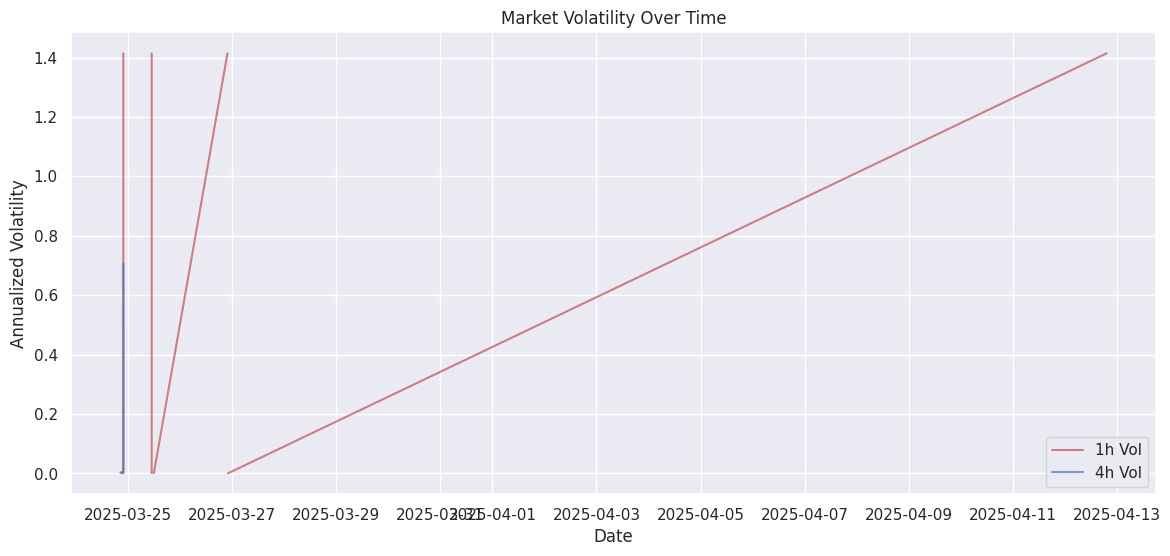

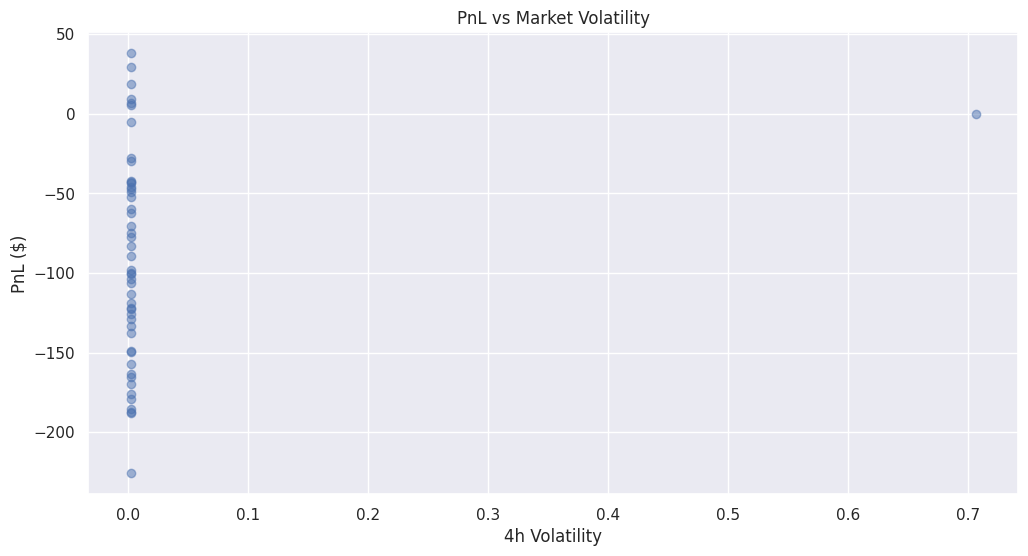

In [13]:
# Analyze volatility impact on trading performance
if 'metrics_df' in locals() and len(metrics_df) > 0:
    # Calculate rolling volatility (if not already in the data)
    # Using price data if available
    if 'mid_price' in metrics_df.columns:
        # Calculate returns
        returns = metrics_df['mid_price'].pct_change().dropna()
        
        # Calculate rolling volatility - 1-hour and 4-hour windows
        vol_1h = returns.rolling(12).std() * np.sqrt(24)  # Annualized
        vol_4h = returns.rolling(48).std() * np.sqrt(24)  # Annualized
        
        # Add to dataframe
        metrics_with_vol = metrics_df.copy()
        metrics_with_vol['volatility_1h'] = vol_1h
        metrics_with_vol['volatility_4h'] = vol_4h
        
        # Plot volatility over time
        plt.figure(figsize=(14, 6))
        plt.plot(metrics_with_vol.index, metrics_with_vol['volatility_1h'], 'r-', alpha=0.7, label='1h Vol')
        plt.plot(metrics_with_vol.index, metrics_with_vol['volatility_4h'], 'b-', alpha=0.7, label='4h Vol')
        plt.title('Market Volatility Over Time')
        plt.xlabel('Date')
        plt.ylabel('Annualized Volatility')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Plot PnL vs volatility
        plt.figure(figsize=(12, 6))
        plt.scatter(metrics_with_vol['volatility_4h'], metrics_with_vol['pnl'], alpha=0.5)
        plt.title('PnL vs Market Volatility')
        plt.xlabel('4h Volatility')
        plt.ylabel('PnL ($)')
        plt.grid(True)
        plt.show()
else:
    print("Insufficient data for volatility analysis")

Backtest Results:


/tmp/ipykernel_425576/331307598.py:25: RuntimeWarning:

divide by zero encountered in scalar divide

/tmp/ipykernel_425576/331307598.py:25: RuntimeWarning:

invalid value encountered in scalar divide



,param_set,final_pnl,final_position,trades,gamma,min_spread
0,default,inf,0.4,206,0.10,0.010
1,aggressive,inf,1.3,215,0.05,0.005
2,conservative,inf,0.1,191,0.20,0.020
3,balanced,inf,0.8,210,0.15,0.015


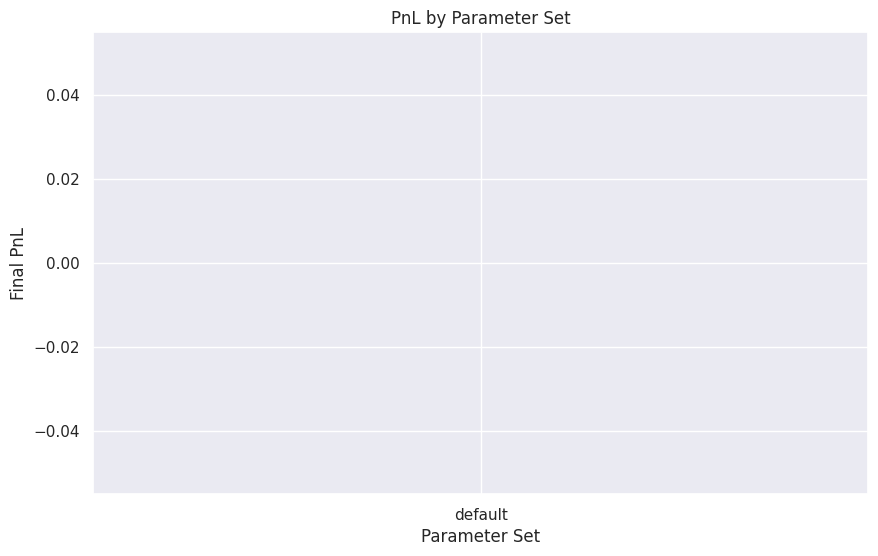

In [14]:
# Simple backtesting function to simulate different parameter sets
def backtest_parameters(price_data, param_sets):
    """Simulate trading with different parameter sets"""
    results = []
    
    for param_name, params in param_sets.items():
        # Extract parameters
        gamma = params.get('gamma', 0.1)
        min_spread = params.get('min_spread', 0.01)
        position_limit = params.get('position_limit', 1.0)
        
        # Initialize simulation variables
        position = 0
        cash = 0
        trades = 0
        
        # Simple simulation of trading using Avellaneda-style market making
        for i in range(1, len(price_data)):
            # Previous price
            prev_price = price_data.iloc[i-1]
            # Current price
            price = price_data.iloc[i]
            
            # Calculate simple price volatility
            price_change = abs(price / prev_price - 1)
            
            # Calculate spread based on gamma and volatility
            spread = max(min_spread, gamma * price_change * price)
            
            # Set bid and ask prices
            bid_price = price * (1 - spread/2)
            ask_price = price * (1 + spread/2)
            
            # Simple simulation of trade execution
            # Buy if position is below limit and price moved down
            if position < position_limit and price < prev_price:
                # Simulate a buy at bid price
                trade_size = 0.1  # Fixed trade size for simplicity
                position += trade_size
                cash -= bid_price * trade_size
                trades += 1
            
            # Sell if position is positive and price moved up
            elif position > 0 and price > prev_price:
                # Simulate a sell at ask price
                trade_size = min(0.1, position)  # Fixed trade size or all position
                position -= trade_size
                cash += ask_price * trade_size
                trades += 1
        
        # Calculate final PnL
        final_value = cash + position * price_data.iloc[-1]
        
        results.append({
            'param_set': param_name,
            'final_pnl': final_value,
            'final_position': position,
            'trades': trades,
            'gamma': gamma,
            'min_spread': min_spread
        })
    
    return pd.DataFrame(results)

# Run backtest if we have price data
if 'metrics_df' in locals() and 'mid_price' in metrics_df.columns:
    # Define parameter sets to test
    param_sets = {
        'default': {'gamma': 0.1, 'min_spread': 0.01, 'position_limit': 1.0},
        'aggressive': {'gamma': 0.05, 'min_spread': 0.005, 'position_limit': 2.0},
        'conservative': {'gamma': 0.2, 'min_spread': 0.02, 'position_limit': 0.5},
        'balanced': {'gamma': 0.15, 'min_spread': 0.015, 'position_limit': 1.5}
    }
    
    # Get price data
    price_data = metrics_df['mid_price'].dropna()
    
    # Run backtest
    if len(price_data) > 10:  # Ensure we have enough data points
        backtest_results = backtest_parameters(price_data, param_sets)
        
        # Display results
        print("Backtest Results:")
        display(backtest_results)
        
        # Plot results
        plt.figure(figsize=(10, 6))
        plt.bar(backtest_results['param_set'], backtest_results['final_pnl'])
        plt.title('PnL by Parameter Set')
        plt.xlabel('Parameter Set')
        plt.ylabel('Final PnL')
        plt.grid(True, axis='y')
        plt.show()
    else:
        print("Insufficient price data for backtesting")
else:
    print("Price data not available for backtesting")

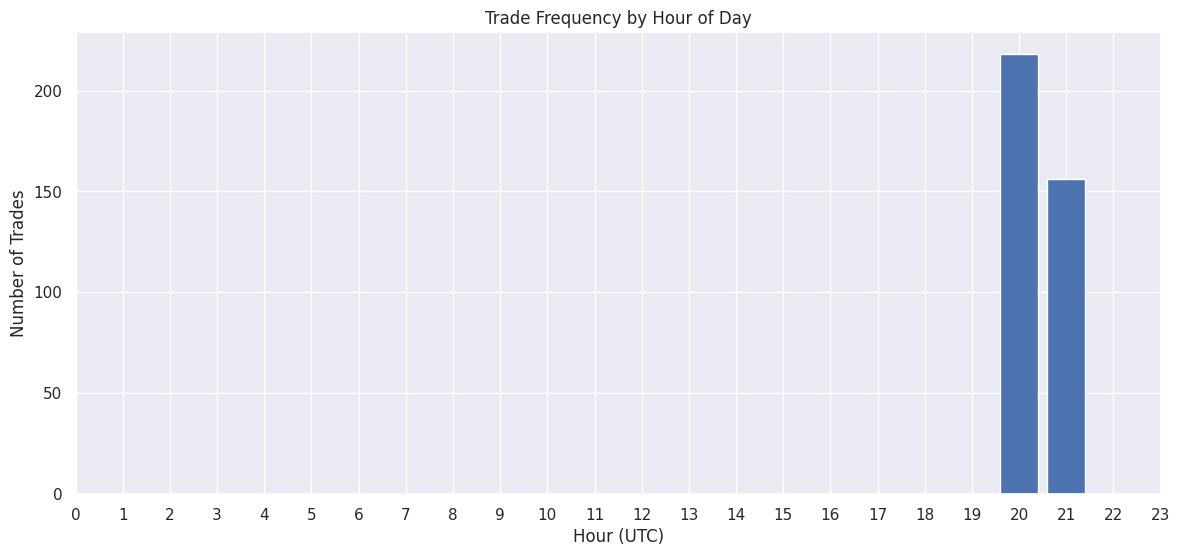

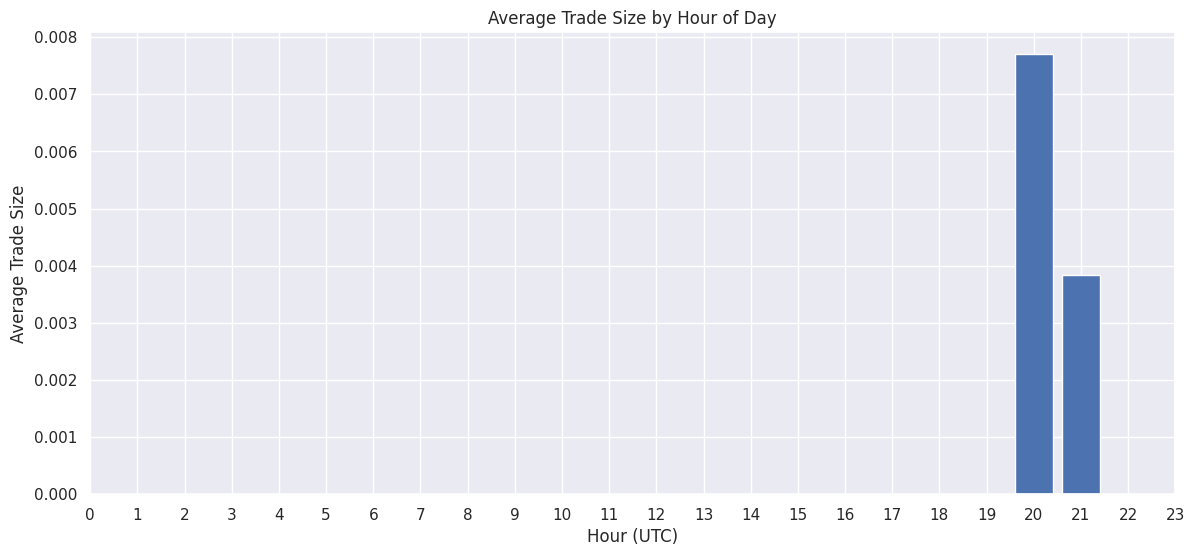

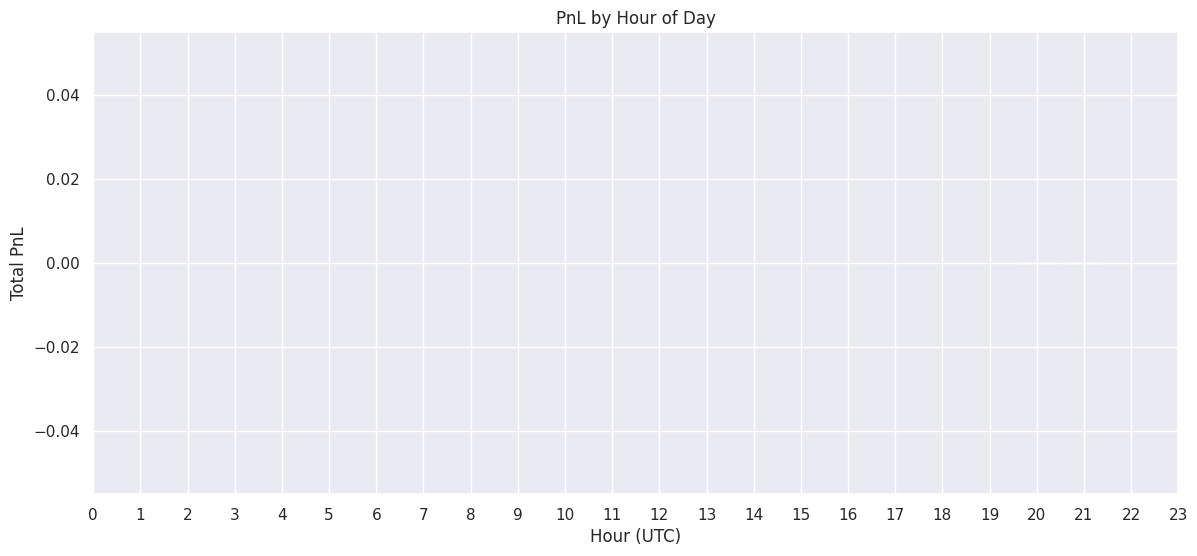

In [15]:
# Analyze trading performance by time of day
if 'trades_df' in locals() and len(trades_df) > 0:
    # Extract hour from the index
    trades_df['hour'] = trades_df.index.hour
    
    # Group by hour
    hourly_stats = trades_df.groupby('hour').agg({
        'price': 'count',  # Number of trades
        'amount': 'mean',  # Average trade size
        'pnl': 'sum' if 'pnl' in trades_df.columns else 'count'  # Total PnL or count if PnL not available
    }).reset_index()
    
    # Rename columns for clarity
    hourly_stats.rename(columns={'price': 'trade_count'}, inplace=True)
    
    # Plot trade frequency by hour
    plt.figure(figsize=(14, 6))
    plt.bar(hourly_stats['hour'], hourly_stats['trade_count'], width=0.8)
    plt.title('Trade Frequency by Hour of Day')
    plt.xlabel('Hour (UTC)')
    plt.ylabel('Number of Trades')
    plt.xticks(range(0, 24))
    plt.grid(True, axis='y')
    plt.show()
    
    # Plot average trade size by hour
    plt.figure(figsize=(14, 6))
    plt.bar(hourly_stats['hour'], hourly_stats['amount'], width=0.8)
    plt.title('Average Trade Size by Hour of Day')
    plt.xlabel('Hour (UTC)')
    plt.ylabel('Average Trade Size')
    plt.xticks(range(0, 24))
    plt.grid(True, axis='y')
    plt.show()
    
    # Plot PnL by hour if available
    if 'pnl' in trades_df.columns:
        plt.figure(figsize=(14, 6))
        plt.bar(hourly_stats['hour'], hourly_stats['pnl'], width=0.8)
        plt.title('PnL by Hour of Day')
        plt.xlabel('Hour (UTC)')
        plt.ylabel('Total PnL')
        plt.xticks(range(0, 24))
        plt.grid(True, axis='y')
        plt.show()
else:
    print("Insufficient trade data for time-of-day analysis")